In [1]:
import cv2 as cv
import cv2 as cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt

## Sample Preparation

In [2]:
pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


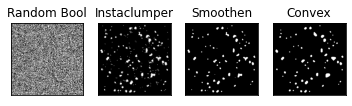

In [4]:
import pygame
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Global Variables
IMGSIZE = 280
SIMSIZE = 300
col_about_to_die = (200, 200, 225)
col_alive = (255, 255, 215)
col_background = (10, 10, 40)
col_grid = (30, 30, 60)

def update(surface, cur, sz, B, S):
    nxt = np.zeros((cur.shape[0], cur.shape[1]))

    for r, c in np.ndindex(cur.shape):
        num_alive = np.sum(cur[r-1:r+2, c-1:c+2]) - cur[r, c]

        if (cur[r, c] == 1 and num_alive not in S):
            col = col_about_to_die
        elif (cur[r, c] == 1 and num_alive in S) or (cur[r, c] == 0 and num_alive in B):
            nxt[r, c] = 1
            col = col_alive

        col = col if cur[r, c] == 1 else col_background
        pygame.draw.rect(surface, col, (c*sz, r*sz, sz, sz))

    return nxt

# Initial pattern (2D random bool array)
def init(dimx, dimy):
    cells = np.zeros((dimy, dimx))
    pattern = np.random.randint(2, size=(IMGSIZE,IMGSIZE)).astype(bool);
    img =  Image.fromarray(pattern)
    img.save("0-boolaray.png", bits=1,optimize=True) # save image
    
    # pattern offset from edge of the universe
    margin = int((SIMSIZE-IMGSIZE)/2)
    pos = (margin,margin) 
    
    # draw pattern
    cells[pos[0]:pos[0]+pattern.shape[0], pos[1]:pos[1]+pattern.shape[1]] = pattern
    
    return cells

def main(dimx, dimy, cellsize):
    pygame.init()
    surface = pygame.display.set_mode((dimx * cellsize, dimy * cellsize))
    pygame.display.set_caption("NPLife Engine")

    cells = init(dimx, dimy) # initialize cells
    
    # Loop 25 steps, instaclumper
    for x in range(25):
        cells = update(surface, cells, cellsize, {3,4,7,8}, {5,6,7,8})
        pygame.display.update()
        
    npcells = np.array(cells)
    img = Image.fromarray(npcells.astype(bool))
    img.save("1-instaclumper.png", bits=1,optimize=True) # save image
        
    # Loop 10 steps, smoothen
    for x in range(4):
        cells = update(surface, cells, cellsize, {5,6,7,8}, {4,5,6,7,8})
        pygame.display.update()
        
    npcells = np.array(cells)
    img = Image.fromarray(npcells.astype(bool))
    img.save("2-smoothen.png", bits=1,optimize=True) # save image
        
    # Loop 10 steps, convex
    for x in range(10):
        cells = update(surface, cells, cellsize, {4,5,6,7,8}, {4,5,6,7,8})
        pygame.display.update()
        
    # Export the image
    npcells = np.array(cells)
    img = Image.fromarray(npcells.astype(bool))
    img.save("3-convex-mask.png", bits=1,optimize=True) # save image
    
    # Exit condition: Game ends when you click exit
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                return

if __name__ == "__main__":
    main(SIMSIZE, SIMSIZE, 3)
    
plt.subplot(141),plt.imshow(Image.open("0-boolaray.png")),plt.title('Random Bool')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(Image.open("1-instaclumper.png")),plt.title('Instaclumper')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(Image.open("2-smoothen.png")),plt.title('Smoothen')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(Image.open("3-convex-mask.png")),plt.title('Convex')
plt.xticks([]), plt.yticks([])
plt.show()

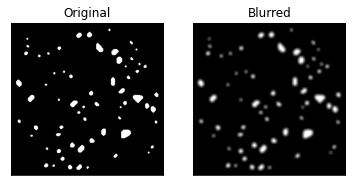

In [5]:


import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('3-convex-mask.png')
blur = cv.blur(img,(7,7))

# Export the image
img1 = Image.fromarray(blur)
img1.save("4-blur.png", bits=1,optimize=True) # save image
    
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

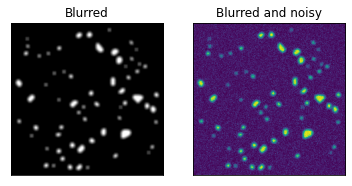

In [6]:
from PIL import Image
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.util import random_noise

im = Image.open("4-blur.png")
# convert PIL Image to ndarray
im_arr = np.asarray(im)

# random_noise() method will convert image in [0, 255] to [0, 1.0],
# inherently it use np.random.normal() to create normal distribution
# and adds the generated noised back to image
noise_img = random_noise(im_arr, mode='gaussian', var=0.15**2)
noise_img = (255*noise_img).astype(np.uint8)

img = Image.fromarray(noise_img)

# Export the image
img.save("5-noise.png", bits=1,optimize=True) # save image
image = cv.imread('5-noise.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img2 = Image.fromarray(gray)
img2.save("6-noise-grayscale.png", bits=1,optimize=True) # save image

plt.subplot(121),plt.imshow(im),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2),plt.title('Blurred and noisy')
plt.xticks([]), plt.yticks([])
plt.show()

number_clusters: 0
number_isolated: 64


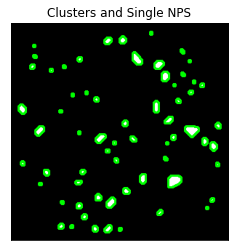

In [7]:
#https://stackoverflow.com/questions/65169869/detecting-and-counting-blobs-connected-objects-with-opencv
import cv2 as cv
import numpy as np

# read input image
img = cv.imread('3-convex-mask.png')

# convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# threshold to binary
thresh = cv.threshold(gray, 128, 255, cv.THRESH_BINARY)[1]

# find contours
#label_img = img.copy()
contour_img = img.copy()
contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
index = 1
isolated_count = 0
cluster_count = 0
for cntr in contours:
    area = cv.contourArea(cntr)
    convex_hull = cv.convexHull(cntr)
    convex_hull_area = cv.contourArea(convex_hull)
    ratio = area / convex_hull_area
    #print(index, area, convex_hull_area, ratio)
    #x,y,w,h = cv.boundingRect(cntr)
    #cv.putText(label_img, str(index), (x,y), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,255), 2)
    if ratio < 0.91:
        # cluster contours in red
        cv.drawContours(contour_img, [cntr], 0, (0,0,255), 2)
        cluster_count = cluster_count + 1
    else:
        # isolated contours in green
        cv.drawContours(contour_img, [cntr], 0, (0,255,0), 2)
        isolated_count = isolated_count + 1
    index = index + 1
    
print('number_clusters:',cluster_count)
print('number_isolated:',isolated_count)

# save result
cv.imwrite("blobs_connected_result.jpg", contour_img)

# show images
plt.imshow(contour_img),plt.title('Clusters and Single NPS')
plt.xticks([]), plt.yticks([])
plt.show()


In [8]:
# Standard imports
import cv2
import numpy as np;

# Read image
im = cv2.imread("3-convex-mask.png")

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
# OLD: detector = cv2.SimpleBlobDetector(params)
detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



3635


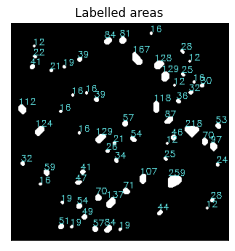

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('3-convex-mask.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
total = 0

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    mask = np.zeros(image.shape, dtype=np.uint8)
    cv2.fillPoly(mask, [c], [255,255,255])
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    pixels = cv2.countNonZero(mask)
    total += pixels
    cv2.putText(image, '{}'.format(pixels), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (100,240,240), 1)

print(total)

plt.imshow(image),plt.title('Labelled areas')
plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
import cv2
import numpy

frame = cv2.imread('3-convex-mask.png')

if frame is None:
    print('Error loading image')
    exit()

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# PErform the operation
output = cv2.connectedComponentsWithStats(frame, 8, cv2.CV_32S)

# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]


# Data print
print("Number of labels: ", num_labels)
print("Label matrix: \n", labels)
print("Stat matrix (column 5 is area): \n", stats)
print("Centroids: \n", centroids)

Number of labels:  65
Label matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Stat matrix (column 5 is area): 
 [[    0     0   300   300 86365]
 [  191    13     4     5    16]
 [  149    19    10    11    81]
 [  128    21    11    10    84]
 [   30    31     4     4    12]
 [  233    37     6     7    28]
 [  167    41    14    18   167]
 [   30    45     6     5    22]
 [   91    48     7     7    39]
 [  197    53    14    12   128]
 [  244    52     4     4    12]
 [   26    58     7     7    41]
 [   71    59     5     5    19]
 [   53    64     5     5    21]
 [  207    68    11    14   129]
 [  234    69     6     6    25]
 [  250    80     4     5    16]
 [  223    85     4     4    12]
 [  260    84     6     6    30]
 [  102    95     4     5    16]
 [  244    94     7     6    32]
 [   83    98     4     5    16]
 [  114   103     7     7    39]
 [  227   105     7     7    36]
 [  196   108   

Real Count:  64
Real Area Mean:  56.796875
Real Area Standard Deviation:  50.20837196359164


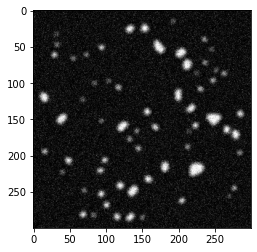

In [11]:
img = cv.imread("6-noise-grayscale.png",0)

total_count = cluster_count + isolated_count

relevant_rows = stats[1:]
area = []
for i in relevant_rows:
    area.append(i[4])
s = 0
for i in area:
    s=s+i
mean0 = s / len(area)
t = 0
for i in area:
    t= t+ (i-mean0)**2
std0 = np.sqrt(t /len(area))

print("Real Count: ", total_count)
print("Real Area Mean: ",mean0)
print("Real Area Standard Deviation: ",std0)
plt.imshow(img,'gray')    


## Advanced Watershed

Count of Advaned Watershed:  56
Mean Area of Advanced Watershed:  66.71428571428571
Standard Deviation Area of Advanced Watershed:  64.31464626731453
CPU times: total: 172 ms
Wall time: 170 ms


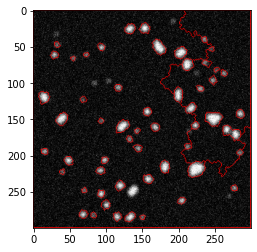

In [12]:
%%time
import cv2 as cv
import numpy as np
import imutils
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt

img = cv.imread("6-noise-grayscale.png",0)
img_AW = cv.imread("6-noise-grayscale.png")
kernel = np.ones((3,3),np.uint8)
ret,th = cv.threshold(img,255,255,cv.THRESH_BINARY+cv.THRESH_OTSU)           # Otsu Binarization step
clean = cv.fastNlMeansDenoising(th)                                          # Denoising step
closing = cv.morphologyEx(clean, cv.MORPH_CLOSE, kernel)                     # Closing step
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)  

sure_bg = cv.dilate(closing,kernel,iterations=50)                            # dilation
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,3)                  # Conversion of Image into Euclidean Distance Map
ret, sure_fg = cv.threshold(dist_transform,0.001*dist_transform.max(),255,0) # Determining Sure Foreground
# Finding unknown region
sure_fg = np.uint8(sure_fg)                                            
unknown = cv.subtract(sure_bg,sure_fg)

ret, markers = cv.connectedComponents(sure_fg)                               # Marking of Sure Foreground
markers = markers+1
markers[unknown==255] = 0
markers = cv.watershed(img_AW,markers)                                       # Watershed Algorithm
img_AW[markers == -1] = [255,0,0]

AREA_AW = []
items= cv.findContours(sure_fg,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)          # Contour Extraction
cnts = imutils.grab_contours(items)
for c in cnts:
    area = cv.contourArea(c)                                                 # Calculation of Contour Area
    AREA_AW.append(area)                                                          

s = 0                                                                        # Obtaining Sample Statistics
for i in AREA_AW:
    s=s+i
mean_AW = s / len(AREA_AW)                                                     
t = 0                        
for i in AREA_AW: 
    t= t+ (i-mean_AW)**2
std_AW = np.sqrt(t /len(AREA_AW))                                                                                       

print("Count of Advaned Watershed: ", len(AREA_AW))
print("Mean Area of Advanced Watershed: ",mean_AW)
print("Standard Deviation Area of Advanced Watershed: ",std_AW)
plt.imshow(img_AW)

## Global Thresholding

(array([3417., 2891., 2875., 3308., 2960., 2756., 2468., 2546., 2319.,
        2244., 2169., 2098., 1910., 1978., 1823., 1889., 1607., 1604.,
        1657., 1452., 1532., 1467., 1326., 1167., 1253., 1168., 1055.,
        1078., 1005.,  871.,  916.,  898.,  795.,  697.,  734.,  696.,
         623.,  647.,  570.,  536.,  553.,  496.,  490.,  416.,  416.,
         418.,  383.,  375.,  349.,  343.,  307.,  271.,  270.,  237.,
         237.,  222.,  178.,  203.,  177.,  188.,  154.,  175.,  167.,
         121.,  125.,  116.,  104.,  121.,  101.,  105.,   90.,   87.,
         103.,   87.,   88.,   75.,   62.,   69.,   58.,   65.,   73.,
          50.,   66.,   56.,   49.,   46.,   56.,   51.,   60.,   43.,
          54.,   56.,   49.,   59.,   46.,   54.,   48.,   49.,   46.,
          51.,   31.,   35.,   32.,   31.,   28.,   40.,   53.,   52.,
          29.,   34.,   30.,   31.,   30.,   46.,   37.,   30.,   31.,
          39.,   52.,   45.,   30.,   39.,   37.,   33.,   36.,   42.,
      

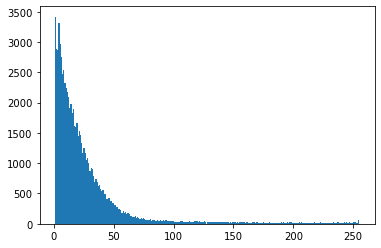

In [13]:
img = cv.imread("6-noise-grayscale.png",0)
plt.hist(img.ravel(), bins=256, range=(1, 255))

What Threshold?: 120
Count of Global Thresholding:  40
Mean Area of Global Thresholding:  53.225
Standard Deviation Area Global Thresholding:  48.33502224060728
CPU times: total: 266 ms
Wall time: 8.51 s


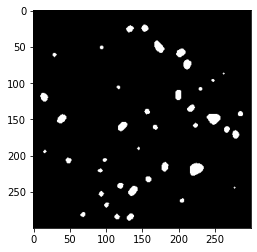

In [14]:
%%time
import cv2 as cv
import cv2 as cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt

img = cv.imread("6-noise-grayscale.png",0)
plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')        # Plotting of image histogram

h = int(input("What Threshold?: "))                                      # Request for input based on histogram shown

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
Blurred = cv.GaussianBlur(img,(3,3),cv.BORDER_DEFAULT)                   # Gaussian Blurring
clean = cv.fastNlMeansDenoising(Blurred)                                 # Denoising 
closing = cv.morphologyEx(clean, cv.MORPH_CLOSE, kernel)                 # Closing 
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)        
ret,GT = cv.threshold(opening,h,255,cv.THRESH_BINARY)                    # Binary Thresholding
items = cv.findContours(GT,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)          # Contour Extraction
cnts = imutils.grab_contours(items)

AREA_GT = []                                                             # Obtaining Sample Statistics
for c in cnts:
    area = cv.contourArea(c)                                         
    AREA_GT.append(area)
s = 0
for i in AREA_GT:
    s=s+i
mean_GT = s / len(AREA_GT)
t = 0
for i in AREA_GT:
    t= t+ (i-mean_GT)**2
std_GT = np.sqrt(t /len(AREA_GT))

print("Count of Global Thresholding: ", len(AREA_GT))
print("Mean Area of Global Thresholding: ",mean_GT)
print("Standard Deviation Area Global Thresholding: ",std_GT)
plt.imshow(GT,'gray')

## Otsu Binarization

Count of Otsu Binarization:  51
Mean Area of Otsu Binarization:  68.30392156862744
Standard Deviation Otsu Binarization:  62.54167852919165
CPU times: total: 188 ms
Wall time: 169 ms


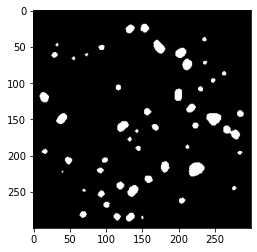

In [15]:
%%time
import cv2 as cv
import numpy as np
import imutils
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt

img = cv.imread("6-noise-grayscale.png",0)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
Blur = cv.GaussianBlur(img,(3,3),cv.BORDER_DEFAULT)                     # Gaussian Blurring 
clean = cv.fastNlMeansDenoising(Blur)                                   # Denoising 
closing = cv.morphologyEx(clean, cv.MORPH_CLOSE, kernel)                # Closing
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)          
ret,OT = cv.threshold(opening,255,255,cv.THRESH_BINARY+cv.THRESH_OTSU)  # Otsu's Binarization
items = cv.findContours(OT,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)         # Contour Extraction 
cnts = imutils.grab_contours(items)

AREA_OT = []                                                            # Obtaining Sample Statistics
for c in cnts:
    area = cv.contourArea(c)  
    AREA_OT.append(area)
s = 0
for i in AREA_OT:
    s=s+i
mean_OT = s / len(AREA_OT)
t = 0
for i in AREA_OT:
    t= t+ (i-mean_OT)**2
std_OT = np.sqrt(t /len(AREA_OT))

print("Count of Otsu Binarization: ", len(AREA_OT))
print("Mean Area of Otsu Binarization: ",mean_OT)
print("Standard Deviation Otsu Binarization: ",std_OT)
plt.imshow(OT,'gray')

In [22]:
LargestValue1

[[239, [222, 218], 177.0],
 [224, [181, 216], 111.5],
 [172, [285, 142], 81.0],
 [128, [16, 194], 66.5],
 [66, [68, 123], 55.0],
 [70, [84, 100], 55.5],
 [21, [0, 84], 3.0],
 [19, [0, 9], 7.5],
 [20, [0, 289], 3.0],
 [17, [0, 288], 11.5],
 [19, [0, 82], 12.5],
 [19, [1, 277], 36.0],
 [18, [0, 10], 11.0],
 [18, [32, 298], 13.0],
 [18, [215, 298], 25.5],
 [17, [0, 175], 1.0],
 [17, [0, 147], 1.0],
 [17, [0, 124], 1.0],
 [17, [250, 4], 22.0],
 [16, [252, 291], 23.5],
 [16, [298, 236], 11.0],
 [16, [0, 227], 5.0],
 [18, [278, 226], 28.5],
 [17, [131, 206], 19.0],
 [16, [0, 134], 5.5],
 [18, [1, 81], 42.0],
 [16, [0, 67], 3.0],
 [17, [294, 65], 33.0],
 [16, [10, 61], 11.5],
 [17, [1, 10], 29.0],
 [16, [90, 0], 12.5],
 [15, [197, 297], 10.0],
 [16, [88, 298], 26.0],
 [15, [276, 297], 48.0],
 [4, [11, 298], 4.5],
 [15, [295, 296], 41.0],
 [15, [226, 283], 50.5],
 [15, [15, 283], 20.5],
 [1, [245, 279], 35.5],
 [1, [255, 271], 7.0],
 [15, [26, 265], 10.0],
 [15, [242, 259], 2.0],
 [1, [286, 26

## TP Method 

1
3
5
7
[[1, 3732], [3, 1830], [5, 605], [7, 288]]
Cut off for gaussian blurring is: 5 x 5
Number of points for 1 x 1 kernel:  3732
Number of points for 3 x 3 kernel:  1830
Number of points for 5 x 5 kernel:  605
Number of points for 7 x 7 kernel:  288


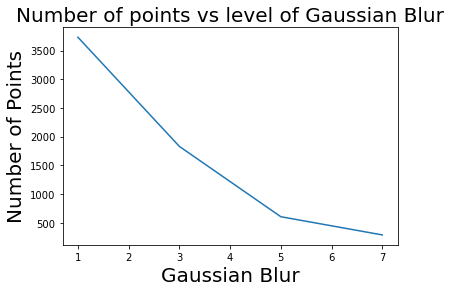

index: 2


C:\Users\tohct\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Which minimum point?: 2
Threshold for prominence: 27
First minimum point: 7.376434024705095
Second minimum point: 27.070172337324973
Third minimum point: 35.68618284909617
First maximum point: 1.2221408020113826
Second maximum point: 13.530727247398808
Number of NP detected (Unrefined):  64


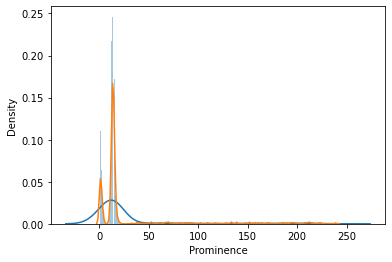

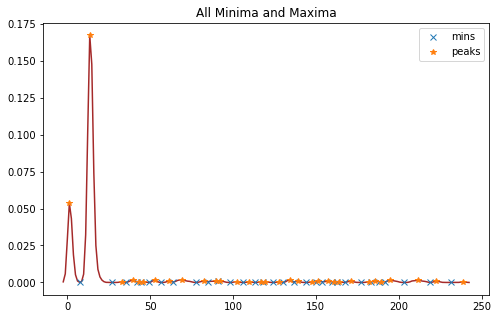

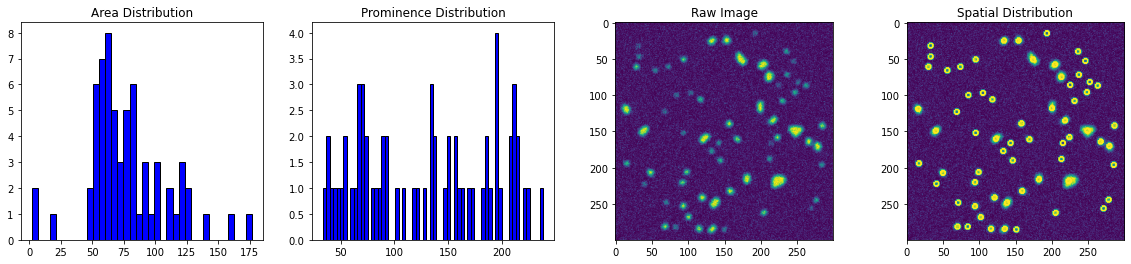

CPU times: total: 5min 4s
Wall time: 5min 55s


In [16]:
import cv2 as cv
import numpy as np
import imutils
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt
img = cv.imread("6-noise-grayscale.png",0)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
Ref_list = []
number_of_points = []
contourcount = []
contourcompiled = []
def splitListOfTuples(lst):                                                                # Definition for splitting Centroid Information
    X_Centroid = []                        
    Y_Centroid = []
    for x, y in lst:
        X_Centroid.append(x)
        Y_Centroid.append(y)
    return (X_Centroid, Y_Centroid)
for k in range (1,9,2):                                                                    # for loop for different gaussian blur kernel sizes
    items=[]
    Compiled_Values=[]
    Compiled_Interior_Points = []
    List = []    
    for i in range (0,255):                                                                # loop for all thresholds
        Blurred_Image = cv.GaussianBlur(img,(k,k),cv.BORDER_DEFAULT)                       # gaussian filter
        clean = cv.fastNlMeansDenoising(Blurred_Image)                                     # cleaning
        closing = cv.morphologyEx(clean, cv.MORPH_CLOSE, kernel)                           # closing
        opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)  
        ret,Thresholded_Image = cv.threshold(opening,255-i,255,cv.THRESH_BINARY)           # Global Thresholding
        items = cv.findContours(Thresholded_Image,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)     # Contour Extraction
        Contours = imutils.grab_contours(items)
        for c in Contours:
            M = cv.moments(c)
            cX = int(M["m10"] / M["m00"])                                                  # Mid Point Extraction
            cY = int(M["m01"] / M["m00"]) 
            area = cv.contourArea(c)                                                       # Area Extraction
            if area>0:               
                if len(Compiled_Values)==0:                                                # if compilation length is 0, append current peak information
                    Contour_Information=[255-i, [cX,cY], area]
                    Compiled_Values.append(Contour_Information)                            # to append [current height, mid point, area data]
                elif len(Compiled_Values) !=0:                                             # if current archive has more than 0 peaks recorded,
                                                                                           # check if current contour contains any recorded pts
                    for j in range(0, len(Compiled_Values)):
                        dist = cv.pointPolygonTest(c,(Compiled_Values[j][1][0],Compiled_Values[j][1][1]),True) 
                                                                                           # check if the mid points lie in contour
                        if dist>0:                                                         # if mid point within current contour, append to new list
                                                                                           # to group all the mid points within a cluster
                            Points_in_Contour=[Compiled_Values[j],area]
                            Compiled_Interior_Points.append(Points_in_Contour)                                   
                            List.append(Points_in_Contour[0][0]) 
                            Highest_Point=max(List)                                        # to denote highest peak within contour            
                    if len(Compiled_Interior_Points)>1:                                    # if there is more than one peak within cluster, adjust
                                                                                           # height of lower peaks with their prominence values
                        for l in range (0,len(Compiled_Interior_Points)):                  # code for prominence adjustment
                            if Compiled_Interior_Points[l][0][0] != Highest_Point:
                                ProminenceValue= Compiled_Interior_Points[l][0][0] - 255+i
                                Contour_Information=[Compiled_Interior_Points[l][0][0], Compiled_Interior_Points[l][0][1], Compiled_Interior_Points[l][0][2], ProminenceValue]
                                Compiled_Values.remove(Compiled_Interior_Points[l][0])
                                Compiled_Values.append(Contour_Information)
                        Compiled_Interior_Points = []    
                    elif len(Compiled_Interior_Points)==1:                                 # if there is only one peak within that contour, adjust area
                        Contour_Information=[Compiled_Interior_Points[0][0][0], Compiled_Interior_Points[0][0][1], Compiled_Interior_Points[0][1]]
                        Compiled_Values.remove(Compiled_Interior_Points[0][0])
                        Compiled_Values.append(Contour_Information)  
                    else:                                                                  # if there is no recorded peak within the current cluster, it is a new peak                                                                                       
                        Contour_Information=[255-i, [cX,cY], area]                         # append to compilation
                        Compiled_Values.append(Contour_Information)
                    Compiled_Interior_Points = [] 
    for i in range(0,len(Compiled_Values)):                                                # code to update height with Prominence Value
        if len(Compiled_Values[i]) == 4:
            Compiled_Values[i][0] = Compiled_Values[i][3]
            Compiled_Values[i].pop()
    Unique_Centroids=[]
    
    for i in range(0,len(Compiled_Values)):                                                # Removing Duplicates
        if Compiled_Values[i][1] not in Unique_Centroids:
            Unique_Centroids.append(Compiled_Values[i][1])   
    x,y=splitListOfTuples(Unique_Centroids)
    Check = []                                                
    Areavalue=[]
    LargestValue1=[]
    n=0
    while n <len(x): 
        for i in range(0,len(Compiled_Values)):
            if Compiled_Values[i][1][0] ==x[n] and Compiled_Values[i][1][1] == y[n] :
                Check.append(Compiled_Values[i])
                Areavalue.append(Compiled_Values[i][2])
                maximum=max(Areavalue)
        index=Areavalue.index(maximum)
        LargestValue1.append(Check[index])
        n=n+1
        Check = [] 
        Areavalue=[]
        maximum=0
    Overall_list = []  
    for i in range(0,len(LargestValue1)):
        Overall_list.append([LargestValue1[i][0],LargestValue1[i][1],LargestValue1[i][2]])

    Refined_list = []                                                                      # Compilation of Refined List with unique centroids
    for i in Overall_list:    
        Refined_list.append(i)
    number_of_points.append([k, len(Refined_list)])
    Ref_list.append(Refined_list)
    print(k)
print(number_of_points)                                                                   # number of NP detected per kernel size counted
gradients = []                                                                            # to determine the cut off for gaussian filtering, find the gradient first
difference = []
for i in range(0, len(number_of_points)-1):
    gradient = (number_of_points[i+1][1] - number_of_points[i][1])/(number_of_points[i+1][0] - number_of_points[i][0]) 
    gradients.append(gradient)
for i in range(0, len(gradients)-1):
    differences = gradients[i+1] - gradients[i]
    difference.append(differences)
maxvalue = max(difference)                                                                # maximium change in gradient to detect necking point in plot
index = difference.index(maxvalue)
l = number_of_points[index + 1][0]
print("Cut off for gaussian blurring is:", l ,"x", l)                                     # printing cut off (necking point) and the number of points per kernel size
print("Number of points for 1 x 1 kernel: ", number_of_points[0][1])
print("Number of points for 3 x 3 kernel: ", number_of_points[1][1])
print("Number of points for 5 x 5 kernel: ", number_of_points[2][1])
print("Number of points for 7 x 7 kernel: ", number_of_points[3][1])                      
x,y=splitListOfTuples(number_of_points)
plt.plot(x, y)
plt.title('Number of points vs level of Gaussian Blur',fontsize=20)
plt.xlabel('Gaussian Blur',fontsize=20)
plt.ylabel('Number of Points',fontsize=20)
plt.show()

g = [number_of_points[index + 1][0], number_of_points[index + 1][1]]                     # plotting of graph to show point of necking
index = number_of_points.index(g)
print("index:",index)

Prominence_Values=[]


for i in range(0,len(Ref_list[index])):
    Prominence_Values.append(Ref_list[index][i][0])
from matplotlib import pyplot as plt                                                     # Code to determine prominence cut off
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks
df= pd.DataFrame()
df['Prominence'] = Prominence_Values
sns.distplot(df.Prominence, bins = 255)
k = sns.kdeplot(df.Prominence, bw_adjust=0.1).get_lines()[1].get_data()
i = np.argmin(k[1])
x_min = k[0][i]
y_min = k[1][i]
series = k[1]
mins, _ =find_peaks(series*-1)
peaks, _ = find_peaks(series)
b = int(input("Which minimum point?: "))                                                # code to request for user input to decide which peak should be removed
e=round(k[0][mins][1])
print("Threshold for prominence:" , e)
fig, ((ax0))= plt.subplots(nrows=1, ncols=1, figsize=(8,5))                             
ax0.plot(k[0], series, color='brown');
ax0.plot(k[0][mins], series[mins], 'x', label='mins')
ax0.plot(k[0][peaks], series[peaks], '*', label='peaks')
ax0.set_title('All Minima and Maxima')
ax0.legend()
print("First minimum point:", k[0][mins][0])
print("Second minimum point:", k[0][mins][1])
print("Third minimum point:", k[0][mins][2])
print("First maximum point:", k[0][peaks][0])
print("Second maximum point:", k[0][peaks][1])


g = number_of_points[index ][0]
img = cv.imread("6-noise-grayscale.png",0)                                             # algorithm with optimised parameters
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
items=[]
Compiled_Values=[]
Compiled_Interior_Points = []
List = []
for i in range (0,255):                                                                # Image Preprocessing Steps
    dst = cv.GaussianBlur(img,(g,g),cv.BORDER_DEFAULT)                                 # Gaussian filtering
    clean = cv.fastNlMeansDenoising(dst)
    closing = cv.morphologyEx(clean, cv.MORPH_CLOSE, kernel)                           # Closing
    opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)  
    ret,th = cv.threshold(opening,255-i,255,cv.THRESH_BINARY)                          # Global Thresholding
    items = cv.findContours(th,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)                    # Contour Extraction
    Contours = imutils.grab_contours(items) 
    for c in Contours:
        M = cv.moments(c)
        cX = int(M["m10"] / M["m00"])                                                  # Centroid Extraction  
        cY = int(M["m01"] / M["m00"])
        area = cv.contourArea(c)                                                       # Area Extraction
        if area>0:
            if len(Compiled_Values)==0:                                                # if compilation length is 0, append current peak information
                Contour_Information=[255-i, [cX,cY], area]                             # to append [current height, mid point, area data]
                Compiled_Values.append(Contour_Information)   
            elif len(Compiled_Values) !=0:                                             # if current archive has more than 0 peaks recorded,
                for j in range(0, len(Compiled_Values)):                               # check if current contour contains any recorded pts
                    dist = cv.pointPolygonTest(c,(Compiled_Values[j][1][0],Compiled_Values[j][1][1]),True)
                    if dist>0:                                                         # check if the mid points lie in contour
                        Points_in_Contour=[Compiled_Values[j],area]                    # if mid point within current contour, append to new list
                        Compiled_Interior_Points.append(Points_in_Contour)             # to group all the mid points within a cluster                                 
                        List.append(Points_in_Contour[0][0])                           # for the highest midpoint  
                        Highest_Point=max(List)                                        # to denote highest peak within contour               
                if len(Compiled_Interior_Points)>1:                                    # if there is more than one peak within cluster, adjust height with prominence values
                    for l in range (0,len(Compiled_Interior_Points)):                  # code for prominence adjustment
                        if Compiled_Interior_Points[l][0][0] != Highest_Point:        
                            ProminenceValue= Compiled_Interior_Points[l][0][0] - 255+i
                            Contour_Information=[Compiled_Interior_Points[l][0][0], Compiled_Interior_Points[l][0][1], Compiled_Interior_Points[l][0][2], ProminenceValue]
                            Compiled_Values.remove(Compiled_Interior_Points[l][0])
                            Compiled_Values.append(Contour_Information)
                    Compiled_Interior_Points = []                          
                elif len(Compiled_Interior_Points)==1:                                 # if there is only one peak within that contour, adjust area if the difference in height 
                    if len(Compiled_Interior_Points[0])==3:                            # the Prominence Value has not been updated
                        PV = abs(Compiled_Interior_Points[0][0][0] - 255+i)            # code for updating prominence value
                        if PV <= e:                                                    # if difference is less than cut off, adjust area
                            Contour_Information=[Compiled_Interior_Points[0][0][0], Compiled_Interior_Points[0][0][1], Compiled_Interior_Points[0][1]]
                            Compiled_Values.remove(Compiled_Interior_Points[0][0])
                            Compiled_Values.append(Contour_Information)
                    else:                                                              # if Prominence Value has been updated
                        PV = abs(Compiled_Interior_Points[0][1] - 255+i)               # check if the vale is prominent enough 
                        if PV <= e:                                                    # if difference is less than cut off, adjust area
                            Contour_Information=[Compiled_Interior_Points[0][0][0], Compiled_Interior_Points[0][0][1], Compiled_Interior_Points[0][1]]
                            Compiled_Values.remove(Compiled_Interior_Points[0][0])
                            Compiled_Values.append(Contour_Information)
                else:
                    Contour_Information=[255-i, [cX,cY], area]                         # else it is a new point and is to be appended under compilation
                    Compiled_Values.append(Contour_Information)
                Compiled_Interior_Points = []  
                
                
for i in range(0,len(Compiled_Values)):                                                # code to update height with Prominence Value
    if len(Compiled_Values[i]) == 4:
        Compiled_Values[i][0] = Compiled_Values[i][3]
        Compiled_Values[i].pop()
def splitListOfTuples(lst):
    X_Centroid = []
    Y_Centroid = []
    for x, y in lst:
        X_Centroid.append(x)
        Y_Centroid.append(y)
    return (X_Centroid, Y_Centroid)
Unique_Centroids=[]                                                                    # Removing Duplicates
for i in range(0,len(Compiled_Values)):
    if Compiled_Values[i][1] not in Unique_Centroids:
        Unique_Centroids.append(Compiled_Values[i][1])    
x,y=splitListOfTuples(Unique_Centroids)
Check = [] 
Areavalue=[]
LargestValue1=[]
n=0
while n <len(x):                                                                       # Compilation of Refined List with unique centroids
    for i in range(0,len(Compiled_Values)):
        if Compiled_Values[i][1][0] ==x[n] and Compiled_Values[i][1][1] == y[n] :
            Check.append(Compiled_Values[i])
            Areavalue.append(Compiled_Values[i][2])
            maximum=max(Areavalue)
    index=Areavalue.index(maximum)
    LargestValue1.append(Check[index])
    n=n+1
    Check = [] 
    Areavalue=[]
    maximum=0
Overall_list = []  
for i in range(0,len(LargestValue1)):
    Overall_list.append([LargestValue1[i][0],LargestValue1[i][1],LargestValue1[i][2]])
Refined_list = []            
Midpoint_list = [] 
for i in Overall_list:
    if i[0] >= e:
        Refined_list.append(i)
        Midpoint_list.append(i[1])
Area_TP=[]
for i in range(0,len(Refined_list)):
    Area_TP.append(Refined_list[i][2])
Prominence_Values=[]
for i in range(0,len(Refined_list)):
    Prominence_Values.append(Refined_list[i][0])  
    
img = cv.imread('6-noise-grayscale.png',0)                                             # Plotting of spatial distributions 
img2 = cv.imread('6-noise-grayscale.png',0)
#plotting of centroids of the maximum areas to check for logic
#img = cv.imread('MN.jpg',0)
centroids=Midpoint_list
canvas = img2
CIRCLE_RADIUS = 3
CIRCLE_THICKNESS = 2
COLOR_RED = np.array([0, 0, 255])
n==0
for c in centroids:
        o_c = (int(c[0]), int(c[1]))
        cv.circle(img2, o_c, CIRCLE_RADIUS, (255, 255, 255), CIRCLE_THICKNESS)

fig, ((ax0, ax1,ax2,ax3))= plt.subplots(nrows=1, ncols=4, figsize=(20,4))
ax0.hist(Area_TP, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
ax0.set_title('Area Distribution')
ax1.hist(Prominence_Values, color = 'blue', edgecolor = 'black',
         bins = len(Prominence_Values))
ax1.set_title('Prominence Distribution')
ax2.imshow(img)
ax2.set_title('Raw Image')
ax3.imshow(img2)
ax3.set_title('Spatial Distribution')
print("Number of NP detected: ", len(Refined_list))
plt.show()                                                                                    # Obtaining Sample Statistics
s = 0
for i in Area_TP: 
    s=s+i
mean_TP = s / len(Area_TP)
t = 0
for i in Area_TP:
    t= t+ (i-mean_TP)**2
std_TP = np.sqrt(t /len(Area_TP))
 

# Optimisation

## Code with optimised parameters

In [17]:
Area1[1]

111.5

## For Area Analysis 

[12.5, 45.5, 70.0, 12.5, 40.0, 38.5, 34.0, 7.0, 42.5, 12.5, 20.0, 119.0, 57.0, 58.0, 10.0, 36.0, 232.0, 90.0, 31.5, 47.0, 16.5, 23.5, 25.0, 17.5, 18.0, 82.0, 7.0, 14.0, 57.0, 42.5, 35.5, 111.5, 10.0, 194.5, 107.0, 42.0, 45.5, 72.0, 10.0, 96.0, 99.0, 27.0, 29.5, 10.0, 10.0, 23.5, 7.0, 21.5, 10.0, 17.5, 111.0, 14.0, 12.5, 31.0, 110.5, 7.0, 29.5, 15.0, 146.0, 20.0, 7.0, 70.0, 67.5, 10.0]
640.0


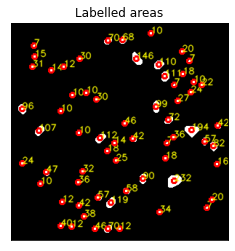

In [18]:
items=[]
midpoints=[]
Area=[]
Final1=[]
threshold=[]
Prominence = []
List = []

import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('3-convex-mask.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
total = 0

# font
font = cv2.FONT_HERSHEY_SIMPLEX
  

  
# fontScale
fontScale = 0.4
   
# Red color in BGR
color = (255, 255,0)
  
# Line thickness of 2 px
thickness = 1


for c in cnts:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    area = cv.contourArea(c)
    midpoints.append([cX,cY])
    Area.append(area)
    
b=0
print(Area)
for c in midpoints:
        
        o_c = (int(c[0]), int(c[1]))
        cv2.circle(image, o_c, CIRCLE_RADIUS, (255, 0, 0), CIRCLE_THICKNESS)
        cv2.putText(image, str(round(Area[b])), o_c, font, fontScale, color, thickness, cv2.LINE_AA, False)
        b= b+1
        total = total + area

print(total)

plt.imshow(image),plt.title('Labelled areas')
plt.xticks([]), plt.yticks([])
plt.show()

# Obtaining sample statistics from all methods


In [19]:
import cv2 as cv
import cv2 as cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt

Text(200, 450, '27')

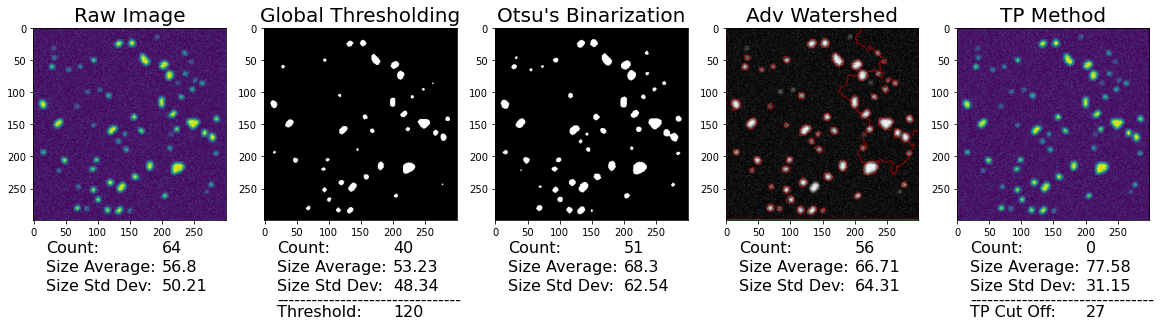

In [27]:
fig, ((ax0, ax1,ax2,ax3,ax4))= plt.subplots(nrows=1, ncols=5, figsize=(20,4))


ax0.imshow(img)
ax0.set_title('Raw Image',fontsize=20)
ax0.text(20,350,"Count:",fontsize=16)
ax0.text(200,350,total_count,fontsize=16)
ax0.text(20,380,"Size Average:",fontsize=16)
ax0.text(200,380,round(mean0,2),fontsize=16)
ax0.text(20,410,"Size Std Dev:",fontsize=16)
ax0.text(200,410,round(std0,2),fontsize=16)

#Global Thresholding

ax1.imshow(GT,"gray")
ax1.set_title('Global Thresholding',fontsize=20)
ax1.text(20,350,"Count:",fontsize=16)
ax1.text(200,350,len(AREA_GT),fontsize=16)
ax1.text(20,380,"Size Average:",fontsize=16)
ax1.text(200,380,round(mean_GT,2),fontsize=16)
ax1.text(20,410,"Size Std Dev:",fontsize=16)
ax1.text(200,410,round(std_GT,2),fontsize=16)

ax1.text(20,430,"--------------------------------",fontsize=16)

ax1.text(20,450,"Threshold:",fontsize=16)
ax1.text(200,450,round(h,2),fontsize=16)

#Otsu's Binarization

ax2.imshow(OT,"gray")
ax2.set_title("Otsu's Binarization",fontsize=20)
ax2.text(20,350,"Count:",fontsize=16)
ax2.text(200,350,len(AREA_OT),fontsize=16)
ax2.text(20,380,"Size Average:",fontsize=16)
ax2.text(200,380,round(mean_OT,2),fontsize=16)
ax2.text(20,410,"Size Std Dev:",fontsize=16)
ax2.text(200,410,round(std_OT,2),fontsize=16)



#Advanced Watershed

ax3.imshow(img_AW)
ax3.set_title('Adv Watershed',fontsize=20)
ax3.text(20,350,"Count:",fontsize=16)
ax3.text(200,350,len(AREA_AW),fontsize=16)
ax3.text(20,380,"Size Average:",fontsize=16)
ax3.text(200,380,round(mean_AW,2),fontsize=16)
ax3.text(20,410,"Size Std Dev:",fontsize=16)
ax3.text(200,410,round(std_AW,2),fontsize=16)


#TP Method

ax4.imshow(img2)
ax4.set_title('TP Method',fontsize=20)
ax4.text(20,350,"Count:",fontsize=16)
ax4.text(200,350,len(Area1),fontsize=16)
ax4.text(20,380,"Size Average:",fontsize=16)
ax4.text(200,380,round(mean,2),fontsize=16)
ax4.text(20,410,"Size Std Dev:",fontsize=16)
ax4.text(200,410,round(std,2),fontsize=16)

ax4.text(20,430,"--------------------------------",fontsize=16)

ax4.text(20,450,"TP Cut Off:",fontsize=16)
ax4.text(200,450,round(e,2),fontsize=16)